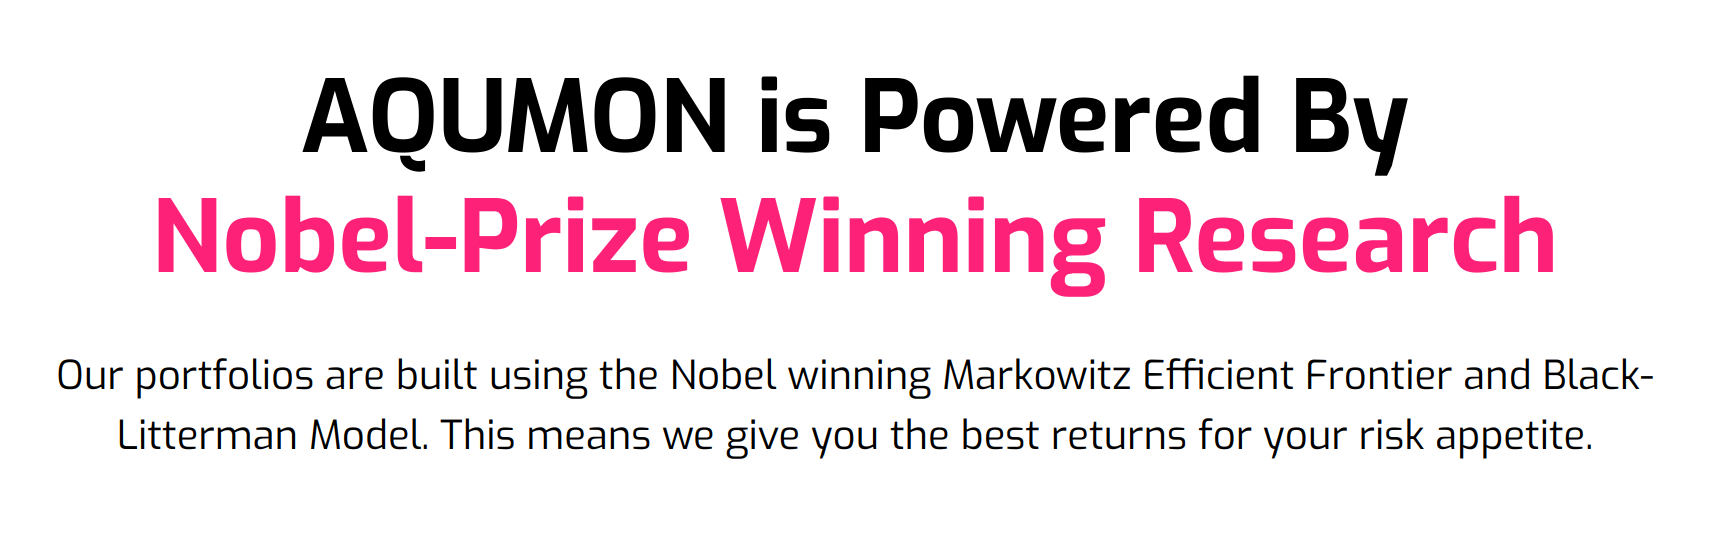

***Necessary Packages***

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import datetime
import yfinance as yf
import riskfolio.PlotFunctions as plf
idx = pd.IndexSlice

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

# Data

## Data Source

In [2]:
# read Symbol details
stock_screener = pd.read_csv('nasdaq_screener_1608297934535.csv')
stock_screener.dropna(subset=['Market Cap'], inplace=True)
stock_screener.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$118.97,1.73,1.476%,3.640482e+10,United States,1999.0,2166714,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$22.18,0.60,2.78%,4.123918e+09,NaN,2016.0,7318439,Basic Industries,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.18,-0.02,-1.667%,3.699359e+07,China,NaN,5972,Consumer Services,Other Consumer Services
3,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.35,0.05,0.485%,9.373219e+08,United States,2020.0,602535,Finance,Business Services
4,AACQU,Artius Acquisition Inc. Unit,$10.88,-0.02,-0.183%,0.000000e+00,United States,2020.0,298530,Finance,Business Services


In [3]:
stock_screener.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 7240
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6301 non-null   object 
 1   Name        6301 non-null   object 
 2   Last Sale   6301 non-null   object 
 3   Net Change  6301 non-null   float64
 4   % Change    6293 non-null   object 
 5   Market Cap  6301 non-null   float64
 6   Country     5873 non-null   object 
 7   IPO Year    3542 non-null   float64
 8   Volume      6301 non-null   int64  
 9   Sector      5650 non-null   object 
 10  Industry    5650 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 590.7+ KB


## To simplify our question: choose top 20 Market Cap Symbol in US

In [4]:
Top20 = stock_screener[stock_screener['Country'] == 'United States'].sort_values(by='Market Cap', ascending=False).head(21)
Top20.reset_index(drop=True, inplace=True)
Top20 = Top20[Top20['Symbol'] != 'GOOG']
Top20.reset_index(drop=True, inplace=True)
Top20.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$128.70,0.89,0.696%,2.231316e+12,United States,1980.0,94359811,Technology,Computer Manufacturing
1,MSFT,Microsoft Corporation Common Stock,$219.42,0.14,0.064%,1.658924e+12,United States,1986.0,32515784,Technology,Computer Software: Prepackaged Software
2,AMZN,Amazon.com Inc. Common Stock,$3236.08,-4.88,-0.151%,1.623707e+12,United States,1997.0,3474347,Consumer Services,Catalog/Specialty Distribution
3,GOOGL,Alphabet Inc. Class A Common Stock,$1740.51,-16.68,-0.949%,1.177327e+12,United States,NaN,1744005,Technology,Computer Software: Programming Data Processing
4,FB,Facebook Inc. Class A Common Stock,$274.48,-1.19,-0.432%,7.817994e+11,United States,2012.0,16377844,Technology,Computer Software: Programming Data Processing


In [5]:
# create the Symbol list
Symbol = Top20.Symbol.to_list()
print(Symbol)

['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'V', 'WMT', 'JNJ', 'JPM', 'PG', 'MA', 'NVDA', 'UNH', 'DIS', 'HD', 'PYPL', 'BAC', 'VZ', 'ADBE']


## Get Data From Yahoofinance

**SPY**
> The SPDR S&P 500 Trust ETF, also known as the SPY ETF, is one of the most popular funds that aims to track the Standard & Poor's 500 Index, which comprises 500 large- and mid-cap U.S. stocks. These stocks are selected by a committee based on the market size, liquidity, and industry.

In [6]:
# plus benchmark: SPY
Symbol.append('SPY')
Symbol

['AAPL',
 'MSFT',
 'AMZN',
 'GOOGL',
 'FB',
 'TSLA',
 'V',
 'WMT',
 'JNJ',
 'JPM',
 'PG',
 'MA',
 'NVDA',
 'UNH',
 'DIS',
 'HD',
 'PYPL',
 'BAC',
 'VZ',
 'ADBE',
 'SPY']

In [9]:
# Date range
start = '2015-10-01'
end = '2020-10-01'
# Downloading data
prices = yf.download(Symbol, start = start, end = end)
prices = prices.dropna()

Exception in thread Exception in thread Thread-6Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
Thread-7:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    :
self._validate_conn(conn)
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 978, in _validate_conn
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
    ht

    return self.sslsocket_class._create(
  File "/home/ubuntu/anaconda3/lib/python3.8/ssl.py", line 1040, in _create
        self._validate_conn(conn)
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 978, in _validate_conn
self.do_handshake()
  File "/home/ubuntu/anaconda3/lib/python3.8/ssl.py", line 1309, in do_handshake
    self.do_handshake()
  File "/home/ubuntu/anaconda3/lib/python3.8/ssl.py", line 1309, in do_handshake
    conn.connect()
  File "/home/ubuntu/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 362, in connect
    self._sslobj.do_handshake()
urllib3.exceptions.ProtocolError: ('Connection aborted.', TimeoutError(110, 'Connection timed out'))

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
            self.sock = ssl_wrap_socket(
  File "/home/ubuntu/anaconda3/lib/p

[*********************100%***********************]  21 of 21 completeded


In [49]:
prices.head()

Adj Close                                                          \
                 AAPL       ADBE        AMZN        BAC        DIS         FB   
Date                                                                            
2015-09-30  25.438564  82.220001  511.890015  14.080485  95.805756  89.900002   
2015-10-01  25.272509  83.750000  520.719971  14.053372  96.246346  90.949997   
2015-10-02  25.457008  83.989998  532.539978  13.899734  96.555710  92.070000   
2015-10-05  25.549263  85.839996  543.679993  14.179896  97.352524  94.010002   
2015-10-06  25.671497  85.150002  537.479980  14.179896  97.277527  92.800003   

                                                          ...    Volume  \
                 GOOGL          HD        JNJ        JPM  ...      MSFT   
Date                                                      ...             
2015-09-30  638.369995  102.349243  80.972130  52.287682  ...  34958900   
2015-10-01  642.000000  103.714027  80.816002  52.673599  ...  28657900   
2015-10-02  656.989990  104.405273  81.475235  52.526756  ...  41839000   
2015-10-05  671.679993  105.637115  82.195168  53.571934  ...  34369300   
2015-10-06  671.640015  105.176300  81.032860  53.597855  ...  27017200   

                                                                        \
                NVDA        PG      PYPL        SPY      TSLA      UNH   
Date                                                                     
2015-09-30  13909500  11041900  13672000  163452000  24648000  4638600   
2015-10-01  12232400   8547600   9657000  131079000  22865000  3768300   
2015-10-02   9653600   9085600   7609800  211003300  22120000  3521600   
2015-10-05  12050600   9187700   6119100  126320800  18449500  3491200   
2015-10-06  11330400   8851500   7409800  110274500  26126000  4652000   

                                        
                  V        VZ      WMT  
Date                                    
2015-09-30  9309200  20380600  7979200  
2015-10-01  8679900  22323500  7837200  
2015-10-02  7460400  22336700  7084000  
2015-10-05  7286800  14484600  6300300  
2015-10-06  5782500  15087900  7410900  

[5 rows x 126 columns]

In [11]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-09-30 to 2020-09-30
Columns: 126 entries, ('Adj Close', 'AAPL') to ('Volume', 'WMT')
dtypes: float64(105), int64(21)
memory usage: 1.2 MB


## Separate Data and save for future use

In [18]:
AdjClose = prices['Adj Close']
AdjClose.to_csv('./Data/AdjClose.csv')

In [7]:
AdjClose_from_csv = pd.read_csv('./Data/AdjClose.csv', index_col='Date', parse_dates=True)
AdjClose_from_csv.head()

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,...,MSFT,NVDA,PG,PYPL,SPY,TSLA,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,25.438564,82.220001,511.890015,14.080485,95.805756,89.900002,638.369995,102.349243,80.972130,52.287682,...,40.118252,24.027483,61.373466,31.040001,172.958771,49.680000,106.765495,67.086021,34.394016,57.062309
2015-10-01,25.272509,83.750000,520.719971,14.053372,96.246346,90.949997,642.000000,103.714027,80.816002,52.673599,...,40.435497,23.559608,61.381996,31.480000,173.410065,47.976002,107.317657,67.403831,33.959248,56.560680
2015-10-02,25.457008,83.989998,532.539978,13.899734,96.555710,92.070000,656.989990,104.405273,81.475235,52.526756,...,41.305664,24.173697,61.782970,32.830002,176.000427,49.514000,109.360764,68.058701,33.864388,57.185535
2015-10-05,25.549263,85.839996,543.679993,14.179896,97.352524,94.010002,671.679993,105.637115,82.195168,53.571934,...,42.266476,24.778042,62.465469,32.669998,179.132309,49.230000,110.115417,69.561058,34.781357,57.968769
2015-10-06,25.671497,85.150002,537.479980,14.179896,97.277527,92.800003,671.640015,105.176300,81.032860,53.597855,...,42.375244,25.099699,62.619034,31.860001,178.518570,48.292000,106.802277,69.416595,34.828785,57.801559


In [8]:
AdjClose_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-09-30 to 2020-09-30
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1260 non-null   float64
 1   ADBE    1260 non-null   float64
 2   AMZN    1260 non-null   float64
 3   BAC     1260 non-null   float64
 4   DIS     1260 non-null   float64
 5   FB      1260 non-null   float64
 6   GOOGL   1260 non-null   float64
 7   HD      1260 non-null   float64
 8   JNJ     1260 non-null   float64
 9   JPM     1260 non-null   float64
 10  MA      1260 non-null   float64
 11  MSFT    1260 non-null   float64
 12  NVDA    1260 non-null   float64
 13  PG      1260 non-null   float64
 14  PYPL    1260 non-null   float64
 15  SPY     1260 non-null   float64
 16  TSLA    1260 non-null   float64
 17  UNH     1260 non-null   float64
 18  V       1260 non-null   float64
 19  VZ      1260 non-null   float64
 20  WMT     1260 non-null   float64
dtypes: float64(21)
memo

In [42]:
DF_list = []
for symbol in Symbol:
    price_ = prices.drop(columns='Adj Close').loc[:, (slice(None), symbol)].dropna()
    price_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    price_ = pd.concat({symbol: price_}, names=['Symbol'])
    DF_list.append(price_)
CHLOV = pd.concat(DF_list)
CHLOV.to_csv('./Data/CHLOV.csv')

In [11]:
CHLOV_from_csv = pd.read_csv('./Data/CHLOV.csv', index_col=['Symbol', 'Date'], parse_dates=True)
CHLOV_from_csv

Close        High         Low        Open     Volume
Symbol Date                                                                 
AAPL   2015-09-30   27.575001   27.885000   27.182501   27.542500  265892000
       2015-10-01   27.395000   27.405001   26.827499   27.267500  255716400
       2015-10-02   27.594999   27.752501   26.887501   27.002501  232079200
       2015-10-05   27.695000   27.842501   27.267500   27.469999  208258800
       2015-10-06   27.827499   27.934999   27.442499   27.657499  192787200
...                       ...         ...         ...         ...        ...
SPY    2020-09-24  323.500000  326.799988  319.799988  321.220001   76681300
       2020-09-25  328.730011  329.579987  321.640015  322.579987   71069400
       2020-09-28  334.190002  334.959991  332.149994  333.220001   64584600
       2020-09-29  332.369995  334.769989  331.619995  333.970001   51304000
       2020-09-30  334.890015  338.290009  332.880005  333.089996  103653800

[26460 rows x 5 columns]

In [12]:
CHLOV_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26460 entries, ('AAPL', Timestamp('2015-09-30 00:00:00')) to ('SPY', Timestamp('2020-09-30 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   26460 non-null  float64
 1   High    26460 non-null  float64
 2   Low     26460 non-null  float64
 3   Open    26460 non-null  float64
 4   Volume  26460 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1+ MB


# BASE: Mean Variance Optimization, or more general, Efficient frontier optimization

[Reference Document](https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html)

In [13]:
mu = pyp.expected_returns.mean_historical_return(AdjClose_from_csv.drop('SPY', axis=1))
S = pyp.risk_models.CovarianceShrinkage(AdjClose_from_csv.drop('SPY', axis=1)).ledoit_wolf()

## Minimising volatility for a given target return.

In [15]:
ef = pyp.efficient_frontier.EfficientFrontier(mu, S)
wt_efficient_return = ef.efficient_return(target_return=0.7, market_neutral=False)
cleaned_wt_efficient_return = ef.clean_weights()
cleaned_wt_efficient_return

OrderedDict([('AAPL', 0.0),
             ('ADBE', 0.0),
             ('AMZN', 0.27334),
             ('BAC', 0.0),
             ('DIS', 0.0),
             ('FB', 0.0),
             ('GOOGL', 0.0),
             ('HD', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('MA', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.60068),
             ('PG', 0.0),
             ('PYPL', 0.08199),
             ('TSLA', 0.04399),
             ('UNH', 0.0),
             ('V', 0.0),
             ('VZ', 0.0),
             ('WMT', 0.0)])

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 70.0%
Annual volatility: 35.8%
Sharpe Ratio: 1.90


(0.7, 0.3584353678829302, 1.8971342142277017)

In [156]:
cleaned_wt_efficient_return.keys()

odict_keys(['AAPL', 'ADBE', 'AMZN', 'BAC', 'DIS', 'FB', 'GOOGL', 'HD', 'JNJ', 'JPM', 'MA', 'MSFT', 'NVDA', 'PG', 'PYPL', 'TSLA', 'UNH', 'V', 'VZ', 'WMT'])

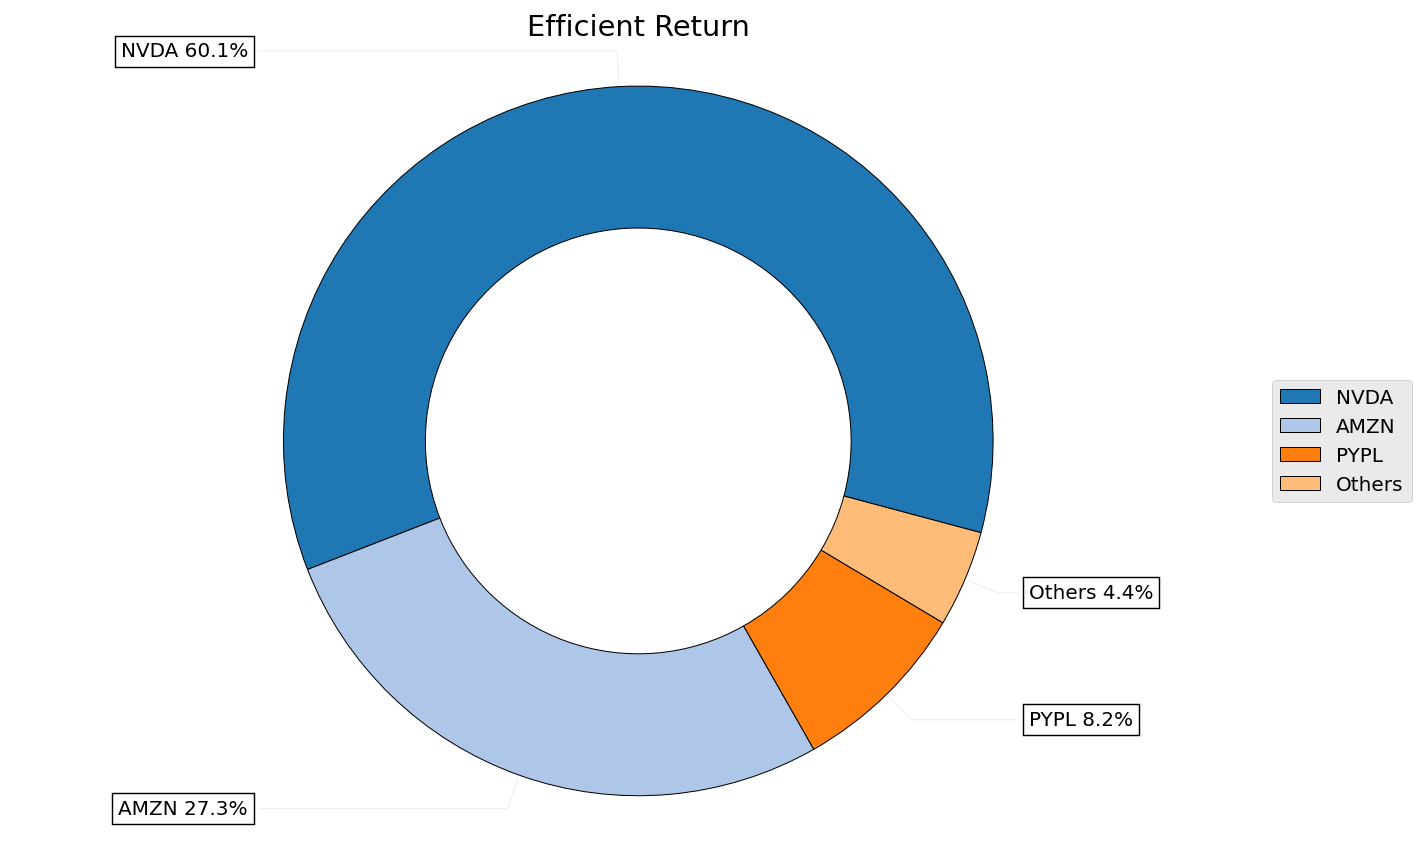

In [183]:
# Plotting the composition of the last portfolio

w = pd.DataFrame(cleaned_wt_efficient_return.values(), index=cleaned_wt_efficient_return.keys()) 
ax = plf.plot_pie(w=w, title='Efficient Return', nrow=20, cmap = "tab20",
                  height=6, width=10, ax=None)

## Maximise return for a target risk

In [17]:
ef = pyp.efficient_frontier.EfficientFrontier(mu, S)
wt_efficient_risk = ef.efficient_risk(target_volatility=0.3, market_neutral=False)
cleaned_wt_efficient_risk = ef.clean_weights()
cleaned_wt_efficient_risk

OrderedDict([('AAPL', 0.0),
             ('ADBE', 0.0),
             ('AMZN', 0.27177),
             ('BAC', 0.0),
             ('DIS', 0.0),
             ('FB', 0.0),
             ('GOOGL', 0.0),
             ('HD', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('MA', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.44427),
             ('PG', 0.0397),
             ('PYPL', 0.09),
             ('TSLA', 0.03846),
             ('UNH', 0.0),
             ('V', 0.0),
             ('VZ', 0.0),
             ('WMT', 0.1158)])

In [18]:
ef.portfolio_performance(verbose=True)

Expected annual return: 59.4%
Annual volatility: 30.0%
Sharpe Ratio: 1.91


(0.5942696687191433, 0.2999999999388195, 1.91423222945419)

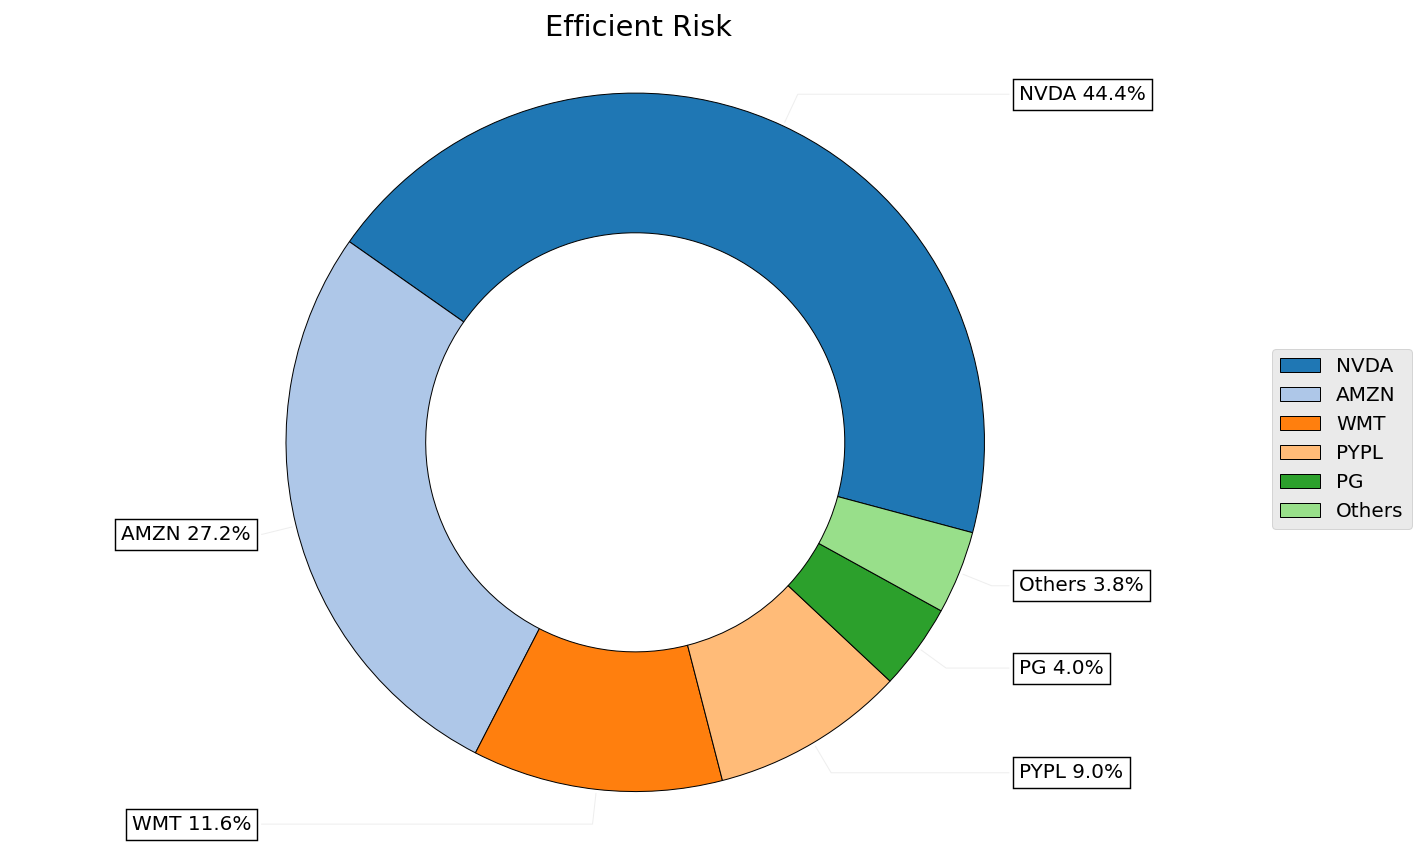

In [171]:
# Plotting the composition of the last portfolio

w = pd.DataFrame(cleaned_wt_efficient_risk.values(), index=cleaned_wt_efficient_risk.keys()) 
ax = plf.plot_pie(w=w, title='Efficient Risk', nrow=20, cmap = "tab20",
                  height=6, width=10, ax=None)

## Maximize Shape Ratio

In [19]:
ef = pyp.efficient_frontier.EfficientFrontier(mu, S)
wt_max_sharpe = ef.max_sharpe(risk_free_rate=0.0069)
cleaned_wt_max_sharpe = ef.clean_weights()
cleaned_wt_max_sharpe

OrderedDict([('AAPL', 0.0),
             ('ADBE', 0.0),
             ('AMZN', 0.26409),
             ('BAC', 0.0),
             ('DIS', 0.0),
             ('FB', 0.0),
             ('GOOGL', 0.0),
             ('HD', 0.0),
             ('JNJ', 0.0),
             ('JPM', 0.0),
             ('MA', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.40365),
             ('PG', 0.07808),
             ('PYPL', 0.08443),
             ('TSLA', 0.03669),
             ('UNH', 0.0),
             ('V', 0.0),
             ('VZ', 0.0),
             ('WMT', 0.13306)])

In [20]:
ef.portfolio_performance(verbose=True)

Expected annual return: 56.2%
Annual volatility: 28.3%
Sharpe Ratio: 1.91


(0.5624576096754588, 0.28349840009500143, 1.9134415202825803)

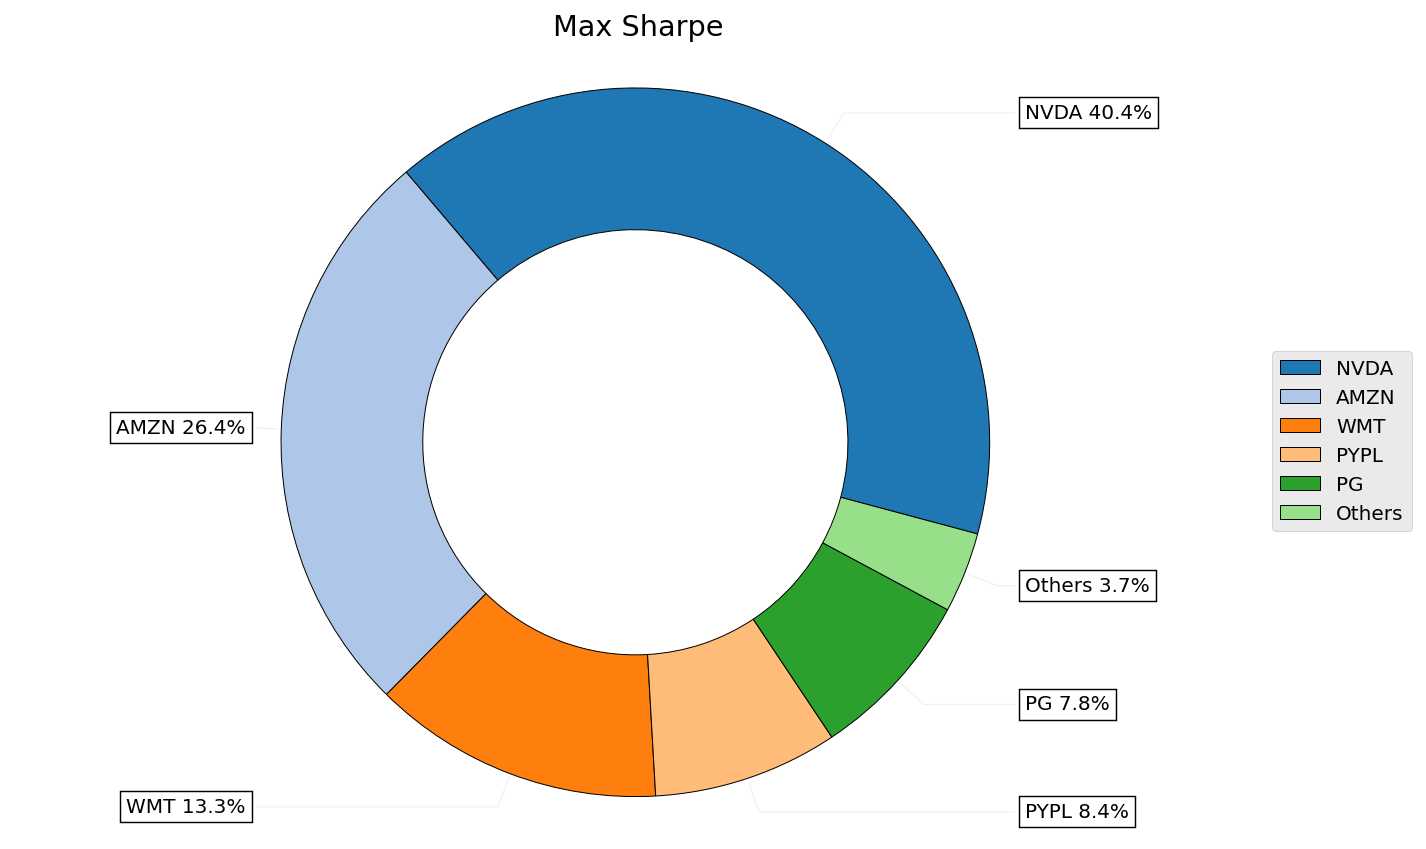

In [172]:
# Plotting the composition of the last portfolio

w = pd.DataFrame(cleaned_wt_max_sharpe.values(), index=cleaned_wt_max_sharpe.keys()) 
ax = plf.plot_pie(w=w, title='Max Sharpe', nrow=20, cmap = "tab20",
                  height=6, width=10, ax=None)

# IMPROVE: Black Litterman

## Construct the prior - Implied market returns

In [21]:
# create market cap dict
mcap_dict = {symbol : cap for symbol, cap in zip(Top20['Symbol'].values, Top20['Market Cap'].values)}
print(mcap_dict)

{'AAPL': 2231315658000.0, 'MSFT': 1658924025518.0, 'AMZN': 1623706968283.0, 'GOOGL': 1177326690679.0, 'FB': 781799372336.0, 'TSLA': 621728090775.0, 'V': 465526889042.0, 'WMT': 413358673789.0, 'JNJ': 404411205273.0, 'JPM': 364778460549.0, 'PG': 341401861213.0, 'MA': 335864149741.0, 'NVDA': 330329350000.0, 'UNH': 324183571986.0, 'DIS': 314209678171.0, 'HD': 294956315971.0, 'PYPL': 275945137938.0, 'BAC': 249402300350.0, 'VZ': 248327042964.0, 'ADBE': 237633595419.0}


In [22]:
# calculate delta
# market-implied risk premium, which is the market’s excess return divided by its variance
delta = pyp.black_litterman.market_implied_risk_aversion(AdjClose_from_csv.SPY, risk_free_rate=0.0069) 
print(delta)

4.024812352683327


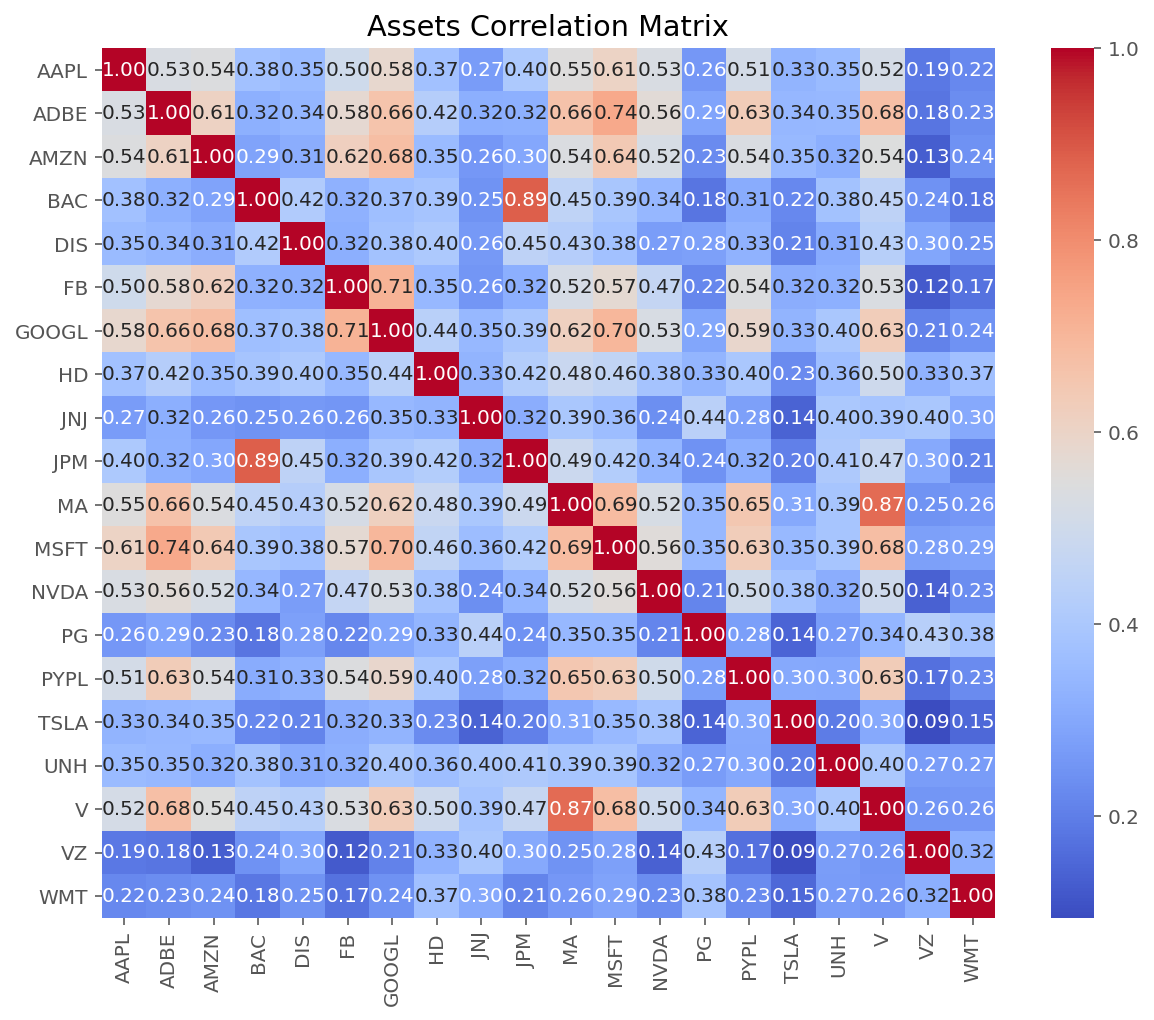

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(AdjClose_from_csv.drop('SPY', axis=1).pct_change().corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')
plt.savefig('./images/ACMatrix.png', bbox_inches='tight')

In [24]:
# calculate prior - market implied retunrs
market_prior = pyp.black_litterman.market_implied_prior_returns(mcap_dict, delta, S)
market_prior.name = 'Prior'
print(market_prior)

AAPL     0.243262
ADBE     0.245198
AMZN     0.226821
BAC      0.212325
DIS      0.162547
FB       0.231753
GOOGL    0.217697
HD       0.178026
JNJ      0.116752
JPM      0.188936
MA       0.226250
MSFT     0.241581
NVDA     0.304341
PG       0.113338
PYPL     0.241894
TSLA     0.295582
UNH      0.174301
V        0.207811
VZ       0.087892
WMT      0.105941
Name: Prior, dtype: float64


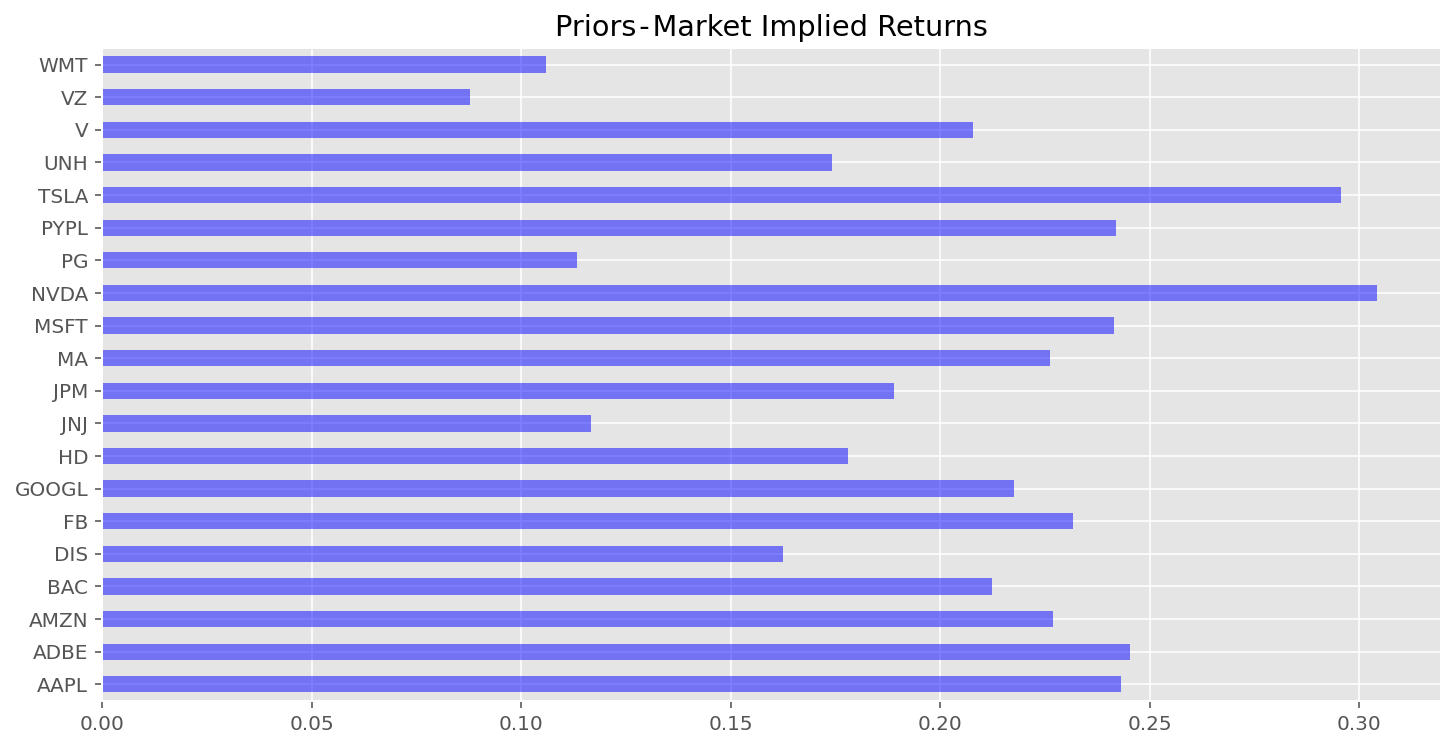

In [25]:
# plot prior
market_prior.plot.barh(figsize=(12,6), title = 'Priors - Market Implied Returns',grid=True, color='b', alpha=0.5)
plt.savefig('./images/MIReturns.png', bbox_inches='tight')

## Create Views

In [ ]:
# #Data for creating views
# # Date range
# start = '2020-10-01'
# end = '2020-12-01'
# # Downloading data
# prices_for_views = yf.download(Symbol, start = start, end = end)
# prices_for_views = prices_for_views.dropna()
# #save to csv for future use
# prices_for_views['Adj Close'].to_csv('prices_for_views.csv')

In [26]:
df = pd.read_csv('prices_for_views.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2020-09-30 to 2020-11-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    43 non-null     float64
 1   ADBE    43 non-null     float64
 2   AMZN    43 non-null     float64
 3   BAC     43 non-null     float64
 4   DIS     43 non-null     float64
 5   FB      43 non-null     float64
 6   GOOGL   43 non-null     float64
 7   HD      43 non-null     float64
 8   JNJ     43 non-null     float64
 9   JPM     43 non-null     float64
 10  MA      43 non-null     float64
 11  MSFT    43 non-null     float64
 12  NVDA    43 non-null     float64
 13  PG      43 non-null     float64
 14  PYPL    43 non-null     float64
 15  TSLA    43 non-null     float64
 16  UNH     43 non-null     float64
 17  V       43 non-null     float64
 18  VZ      43 non-null     float64
 19  WMT     43 non-null     float64
dtypes: float64(20)
memory usage: 7.1 KB


In [27]:
views = pyp.expected_returns.mean_historical_return(df)
views = pd.DataFrame(views)
views.columns=['View']
views

,View
AAPL,0.192317
ADBE,-0.137685
AMZN,0.037365
BAC,1.551380
DIS,1.880949
FB,0.398890
GOOGL,1.942246
HD,-0.006464
JNJ,-0.122036
JPM,2.562569


In [28]:
# create view dict
views_dict = {ind : views['View'][ind] for ind in views.index}
print(views_dict)

{'AAPL': 0.19231727181640168, 'ADBE': -0.137684581817489, 'AMZN': 0.03736467448408365, 'BAC': 1.5513798511714305, 'DIS': 1.8809485854396084, 'FB': 0.3988896847291872, 'GOOGL': 1.942246492166507, 'HD': -0.00646404296606351, 'JNJ': -0.12203581137690633, 'JPM': 2.562568848832116, 'MA': -0.02229011555564231, 'MSFT': 0.1291218351043013, 'NVDA': -0.0558575409526455, 'PG': 0.028437022989636684, 'PYPL': 0.6472109511506479, 'TSLA': 4.363516937564486, 'UNH': 0.576395942802846, 'V': 0.3670658718367674, 'VZ': 0.16838743501367137, 'WMT': 0.6961994616592766}


## Run the BL Model

In [29]:
# run the Bl model
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=views_dict)

In [30]:
# Posterior estimate of returns
bl_return = bl.bl_returns()
bl_return.name = 'Posterior'

In [31]:
# get historical returns
mu.name = 'Historical'
# print(mu)

In [32]:
# create returns dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict)], 
             index=['Prior', 'Historical','Posterior', 'Views']).T
print(returns_df)

          Prior  Historical  Posterior     Views
AAPL   0.243262    0.353959   0.496841  0.192317
ADBE   0.245198    0.429694   0.356117 -0.137685
AMZN   0.226821    0.438524   0.347335  0.037365
BAC    0.212325    0.112092   1.391139  1.551380
DIS    0.162547    0.053125   1.088122  1.880949
FB     0.231753    0.238651   0.535477  0.398890
GOOGL  0.217697    0.180989   0.809968  1.942246
HD     0.178026    0.219825   0.468807 -0.006464
JNJ    0.116752    0.128081   0.135361 -0.122036
JPM    0.188936    0.127866   1.303871  2.562569
MA     0.226250    0.311490   0.524544 -0.022290
MSFT   0.241581    0.392512   0.479762  0.129122
NVDA   0.304341    0.865187   0.451525 -0.055858
PG     0.113338    0.176456   0.186488  0.028437
PYPL   0.241894    0.447604   0.549355  0.647211
TSLA   0.295582    0.539593   2.253913  4.363517
UNH    0.174301    0.238347   0.545002  0.576396
V      0.207811    0.243973   0.531282  0.367066
VZ     0.087892    0.113549   0.219780  0.168387
WMT    0.105941    0

In [99]:
# write it for future reference
returns_df.to_csv('returns.csv', header=True,)

In [33]:
returns_df = pd.read_csv('returns.csv', index_col=[0])

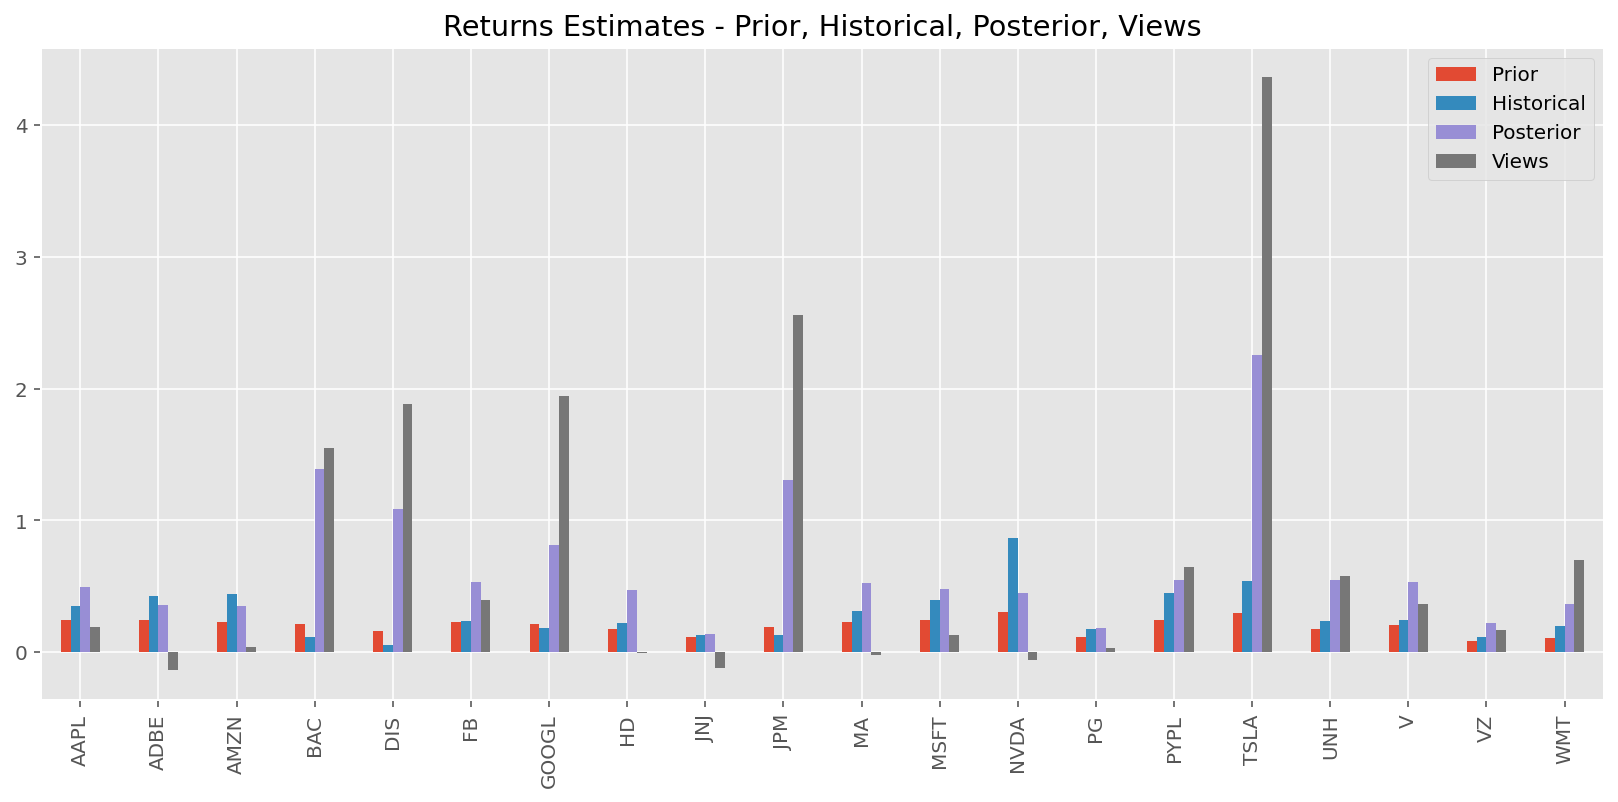

In [34]:
# plot the returns
returns_df.plot.bar(figsize=(14,6), title = 'Returns Estimates - Prior, Historical, Posterior, Views', grid=True);
plt.savefig('./images/EReturns.png', bbox_inches='tight')

In [101]:
# get the covariance matrix
S_bl = bl.bl_cov()
S_bl.to_csv('S_bl.csv')

In [35]:
S_bl = pd.read_csv('S_bl.csv',  index_col=[0])

## portfolio weight ---> For efficient_return()

In [175]:
ef = pyp.EfficientFrontier(bl_return, S_bl)
weights = ef.efficient_return(target_return=0.7, market_neutral=False)
ef.portfolio_performance(verbose=True)
print('\n')
bl_cl_wt_ereturn = ef.clean_weights()
bl_wt_efficient_return = pd.DataFrame([weights],columns=weights.keys()).T * 100

# write it to csv for part 2
bl_wt_efficient_return.to_csv('bl_wt_efficient_return.csv')
bl_wt_efficient_return = pd.read_csv('bl_wt_efficient_return.csv',  index_col=[0])

print ('Weights in Percentage ********************')
print(bl_wt_efficient_return.round(4))

Expected annual return: 70.0%
Annual volatility: 17.0%
Sharpe Ratio: 4.00


Weights in Percentage ********************
             0
AAPL    0.0000
ADBE    0.0000
AMZN    0.0000
BAC     0.0000
DIS    17.9546
FB      0.0000
GOOGL   9.4249
HD      0.0000
JNJ     7.4925
JPM    10.3811
MA      0.0000
MSFT    0.0000
NVDA    0.0000
PG      4.5640
PYPL    0.0000
TSLA    6.7388
UNH     0.0000
V       0.0000
VZ     24.5758
WMT    18.8682


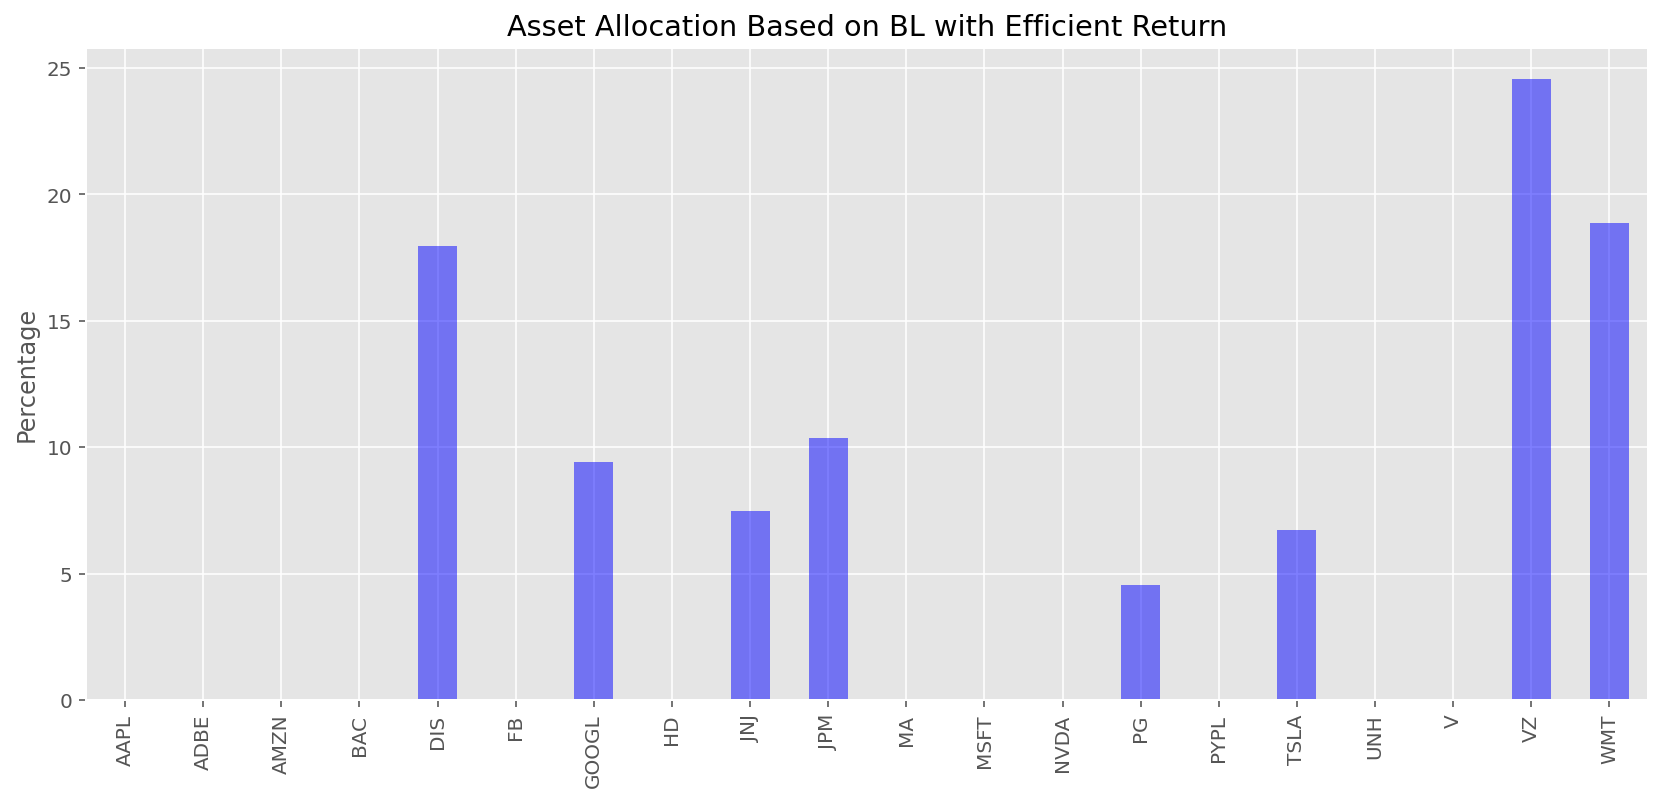

In [38]:
# plot the weights
bl_wt_efficient_return.plot.bar(figsize=(14,6), 
                    title = 'Asset Allocation Based on BL with Efficient Return', grid=True,legend=False, color='b', alpha=0.5)
plt.ylabel('Percentage')
plt.savefig('./images/bl_wt_efficient_return.png', bbox_inches='tight')

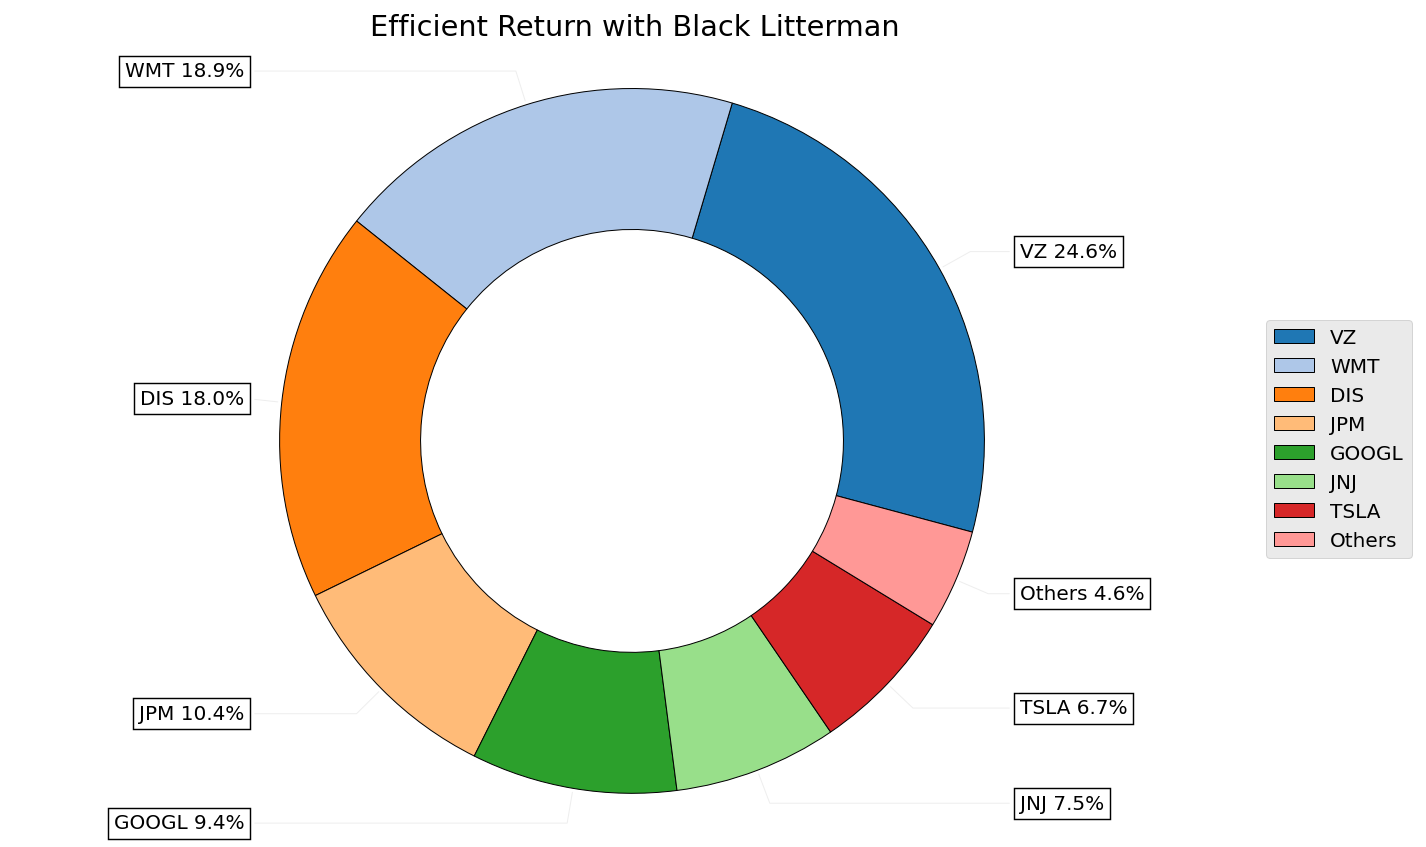

In [179]:
# Plotting the composition of the last portfolio

w = pd.DataFrame(bl_cl_wt_ereturn.values(), index=bl_cl_wt_ereturn.keys()) 
ax = plf.plot_pie(w=w, title='Efficient Return with Black Litterman', nrow=20, cmap = "tab20",
                  height=6, width=10, ax=None)
plt.savefig('Efficient_Return_with_Black_Litterman.png', bbox_inches='tight')

## portfolio weight ---> For efficient_risk()

In [39]:
# Long-only minimum volatility portfolio
ef = pyp.EfficientFrontier(bl_return, S_bl)
weights = ef.efficient_risk(target_volatility=0.3, market_neutral=False)
ef.portfolio_performance(verbose=True)
print('\n')
bl_wt_efficient_risk = pd.DataFrame([weights],columns=weights.keys()).T * 100

# write it to csv for part 2
bl_wt_efficient_risk.to_csv('bl_wt_efficient_risk.csv')
bl_wt_efficient_risk = pd.read_csv('bl_wt_efficient_risk.csv',  index_col=[0])

print ('Weights in Percentage ********************')
print(bl_wt_efficient_risk.round(4))

Expected annual return: 159.3%
Annual volatility: 30.0%
Sharpe Ratio: 5.24


Weights in Percentage ********************
             0
AAPL    0.0000
ADBE    0.0000
AMZN    0.0000
BAC     7.2099
DIS    17.8114
FB      0.0000
GOOGL   0.0000
HD      0.0000
JNJ     0.0000
JPM    41.1122
MA      0.0000
MSFT    0.0000
NVDA    0.0000
PG      0.0000
PYPL    0.0000
TSLA   33.8665
UNH     0.0000
V       0.0000
VZ      0.0000
WMT     0.0000


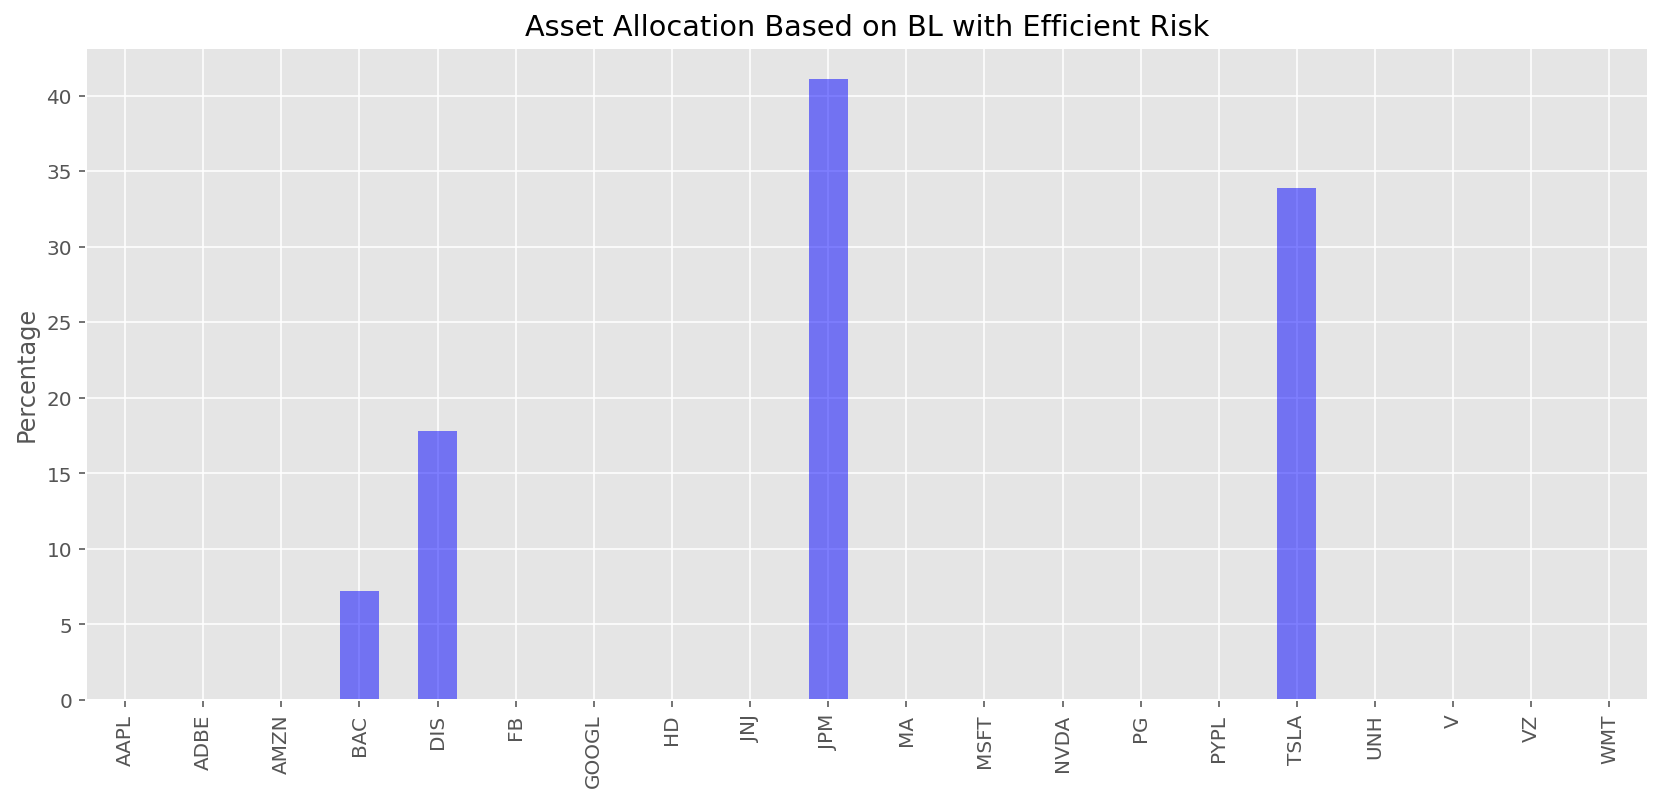

In [40]:
# plot the weights
bl_wt_efficient_risk.plot.bar(figsize=(14,6), 
                    title = 'Asset Allocation Based on BL with Efficient Risk', grid=True,legend=False, color='b', alpha=0.5)
plt.ylabel('Percentage')
plt.savefig('./images/bl_wt_efficient_risk.png', bbox_inches='tight')

## portfolio weight ---> For max_sharpe()

In [41]:
ef = pyp.EfficientFrontier(bl_return, S_bl)
weights = ef.max_sharpe(risk_free_rate=0.0069)
ef.portfolio_performance(verbose=True)
print('\n')
bl_wt_max_sharpe = pd.DataFrame([weights],columns=weights.keys()).T * 100

# write it to csv for part 2
bl_wt_max_sharpe.to_csv('bl_wt_max_sharpe.csv')
bl_wt_max_sharpe = pd.read_csv('bl_wt_max_sharpe.csv',  index_col=[0])

print ('Weights in Percentage ********************')
print(bl_wt_max_sharpe.round(4))

Expected annual return: 146.2%
Annual volatility: 27.0%
Sharpe Ratio: 5.33


Weights in Percentage ********************
             0
AAPL    0.0000
ADBE    0.0000
AMZN    0.0000
BAC     0.0000
DIS    33.0605
FB      0.0000
GOOGL   0.0000
HD      0.0000
JNJ     0.0000
JPM    42.7712
MA      0.0000
MSFT    0.0000
NVDA    0.0000
PG      0.0000
PYPL    0.0000
TSLA   24.1682
UNH     0.0000
V       0.0000
VZ      0.0000
WMT     0.0000


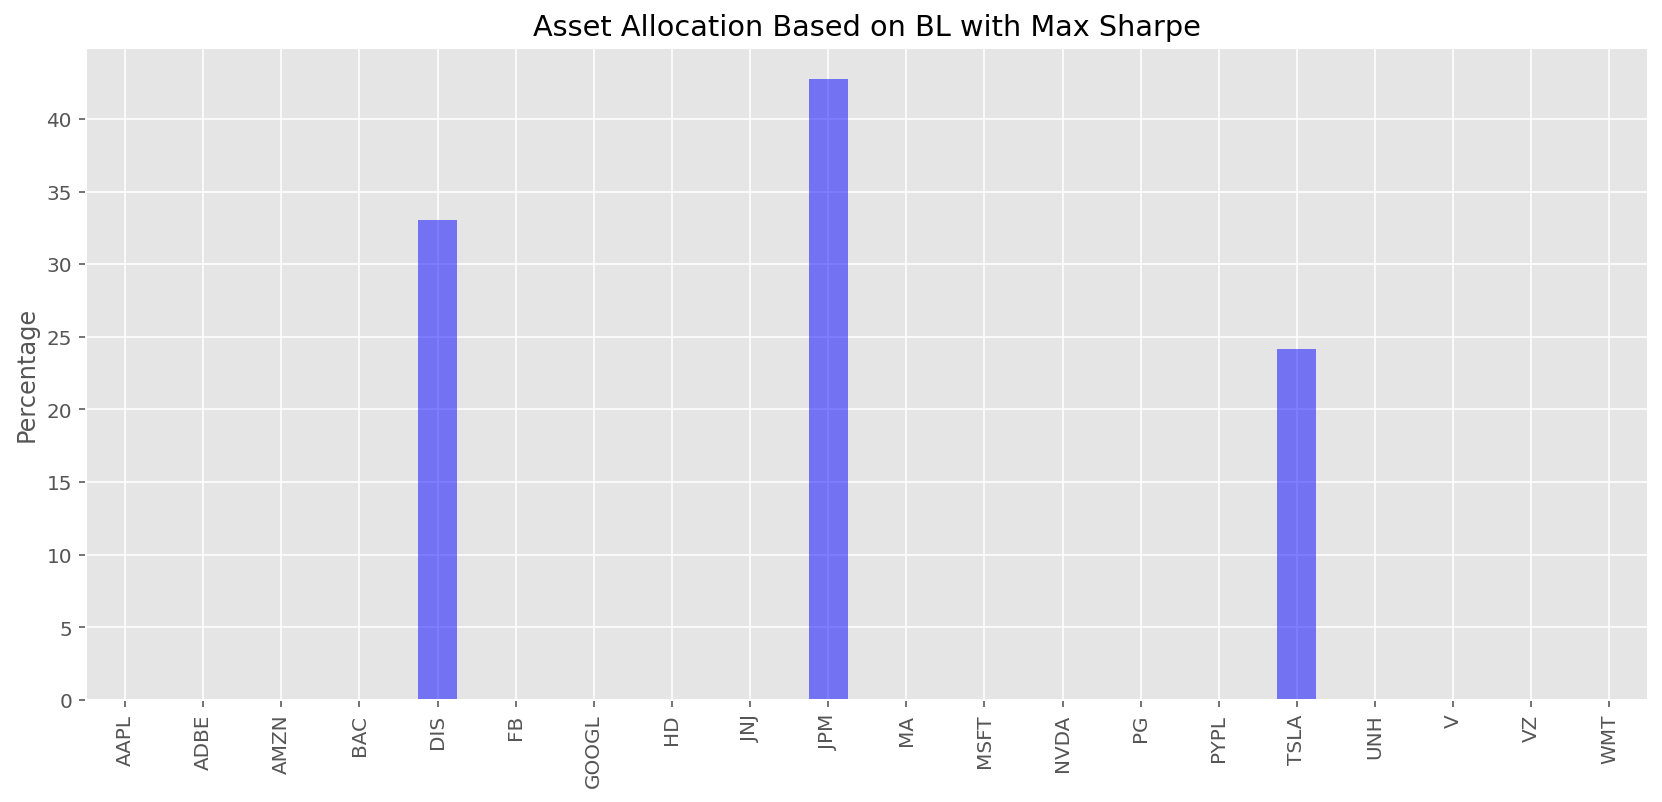

In [42]:
# plot the weights
bl_wt_max_sharpe.plot.bar(figsize=(14,6), 
                    title = 'Asset Allocation Based on BL with Max Sharpe', grid=True,legend=False, color='b', alpha=0.5)
plt.ylabel('Percentage')
plt.savefig('./images/bl_wt_max_sharpe.png', bbox_inches='tight')

# BackTesting

In [80]:
import pyfolio as pf
import backtrader as bt

## BackTest for max sharpe

In [44]:
# Read our 20 tickers weights
bl_wt_efficient_return = pd.read_csv('bl_wt_max_sharpe.csv',  index_col=[0])
bl_wt_efficient_return.T

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
0,0.0,0.0,0.0,0.0,33.060517,0.0,0.0,0.0,0.0,42.771248,0.0,0.0,0.0,0.0,0.0,24.168235,0.0,0.0,0.0,0.0


In [45]:
# create a tuple list of ticker and weight
assets_param = [(ind, bl_wt_efficient_return.loc[ind][0]) for ind in bl_wt_efficient_return.index]
print(assets_param)

[('AAPL', 0.0), ('ADBE', 0.0), ('AMZN', 0.0), ('BAC', 0.0), ('DIS', 33.06051733239334), ('FB', 0.0), ('GOOGL', 0.0), ('HD', 0.0), ('JNJ', 0.0), ('JPM', 42.771248063844965), ('MA', 0.0), ('MSFT', 0.0), ('NVDA', 0.0), ('PG', 0.0), ('PYPL', 0.0), ('TSLA', 24.16823460376172), ('UNH', 0.0), ('V', 0.0), ('VZ', 0.0), ('WMT', 0.0)]


In [46]:
# define the strategy
class Strategy(bt.Strategy):
    # parameters for inputs    
    params = dict(
        assets = [],
        rebalance_months = [1,3,6,9]
    )
 
    # initialize
    def __init__(self):
        # create a dictionary of ticker:{'rebalanced': False, 'target_percent': target%}
        self.rebalance_dict = dict()
        for i, d in enumerate(self.datas):
            self.rebalance_dict[d] = dict()
            self.rebalance_dict[d]['rebalanced'] = False
            for asset in self.p.assets:
                if asset[0] == d._name:
                    self.rebalance_dict[d]['target_percent'] = asset[1]
 
    def next(self):
        # rebalance for the month in the list
        for i, d in enumerate(self.datas):
            dt = d.datetime.datetime()
            dname = d._name
            pos = self.getposition(d).size
 
            if dt.month in self.p.rebalance_months and self.rebalance_dict[d]['rebalanced'] == False:
                print('{} Sending Order: {} | Month {} | Rebalanced: {} | Pos: {}'.
                      format(dt, dname, dt.month,
                             self.rebalance_dict[d]['rebalanced'], pos ))
            
                self.order_target_percent(d, target=self.rebalance_dict[d]['target_percent']/100)
                self.rebalance_dict[d]['rebalanced'] = True
 
            # Reset the flage
            if dt.month not in self.p.rebalance_months:
                self.rebalance_dict[d]['rebalanced'] = False
                
    # notify the order if completed
    def notify_order(self, order):
        date = self.data.datetime.datetime().date()
 
        if order.status == order.Completed:
            print('{} >> Order Completed >> Stock: {},  Ref: {}, Size: {}, Price: {}'.
                  format(date, order.data._name, order.ref, order.size,
                         'NA' if not order.price else round(order.price,5)
                        ))

    # notify the trade if completed        
    def notify_trade(self, trade):
        date = self.data.datetime.datetime().date()
        if trade.isclosed:
            print('{} >> Notify Trade >> Stock: {}, Close Price: {}, Profit, Gross {}, Net {}'.
                  format(date, trade.data._name, trade.price, round(trade.pnl,2),round(trade.pnlcomm,2))
                 )

In [47]:
# starting cash
startcash = 10000

# 0.3% commission
commission = 0.003

#Create an instance of cerebro
cerebro = bt.Cerebro()

cerebro.broker.setcash(startcash)

# orders will not be checked to see if you can afford it before submitting them
cerebro.broker.set_checksubmit(False)

cerebro.broker.setcommission(commission=commission)

In [48]:
# date range for the backtesting
fromdate=datetime.datetime(2015, 9, 30)
todate=datetime.datetime(2020, 9, 30)

In [51]:
Symbol.remove('SPY')
# load the data
for symbol, data in CHLOV_from_csv.groupby(level=0):
    if symbol in Symbol:
        print(f"Adding ticker: {symbol}")
        data = bt.feeds.PandasData(dataname=data.droplevel(level=0),
                                   name=str(symbol),
                                   fromdate=fromdate,
                                   todate=todate,
                                   plot=False)
        cerebro.adddata(data)

Adding ticker: AAPL
Adding ticker: ADBE
Adding ticker: AMZN
Adding ticker: BAC
Adding ticker: DIS
Adding ticker: FB
Adding ticker: GOOGL
Adding ticker: HD
Adding ticker: JNJ
Adding ticker: JPM
Adding ticker: MA
Adding ticker: MSFT
Adding ticker: NVDA
Adding ticker: PG
Adding ticker: PYPL
Adding ticker: TSLA
Adding ticker: UNH
Adding ticker: V
Adding ticker: VZ
Adding ticker: WMT


In [52]:
#Add our strategy
cerebro.addstrategy(Strategy, assets=assets_param)

# add analyzers
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [53]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run the strategy. 
results = cerebro.run(stdstats=True, tradehistory=False)
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
2015-09-30 00:00:00 Sending Order: AAPL | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: ADBE | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: AMZN | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: BAC | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: DIS | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: FB | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: GOOGL | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: HD | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: JNJ | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: JPM | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: MA | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sending Order: MSFT | Month 9 | Rebalanced: False | Pos: 0
2015-09-30 00:00:00 Sendin

2017-06-01 00:00:00 Sending Order: AAPL | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: ADBE | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: AMZN | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: BAC | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: DIS | Month 6 | Rebalanced: False | Pos: 33
2017-06-01 00:00:00 Sending Order: FB | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: GOOGL | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: HD | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: JNJ | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: JPM | Month 6 | Rebalanced: False | Pos: 57
2017-06-01 00:00:00 Sending Order: MA | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: MSFT | Month 6 | Rebalanced: False | Pos: 0
2017-06-01 00:00:00 Sending Order: NVDA | Month 6 | Rebalan

2019-01-02 00:00:00 Sending Order: AAPL | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: ADBE | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: AMZN | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: BAC | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: DIS | Month 1 | Rebalanced: False | Pos: 43
2019-01-02 00:00:00 Sending Order: FB | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: GOOGL | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: HD | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: JNJ | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: JPM | Month 1 | Rebalanced: False | Pos: 54
2019-01-02 00:00:00 Sending Order: MA | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: MSFT | Month 1 | Rebalanced: False | Pos: 0
2019-01-02 00:00:00 Sending Order: NVDA | Month 1 | Rebalan

Final Portfolio Value: 28999.69


In [54]:
# Extract inputs for pyfolio
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
# Extract inputs for pyfolio
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2015-09-30 00:00:00+00:00    0.00000
2015-10-01 00:00:00+00:00   -0.00917
Name: Strategy, dtype: float64

In [66]:
returns.index = returns.index.strftime('%Y-%m-%d')

In [70]:
returns.index = pd.to_datetime(returns.index)

In [67]:
# Get the benchmark returns for comparison
benchmark_rets= AdjClose_from_csv.SPY.pct_change().dropna() 
benchmark_rets = benchmark_rets.filter(returns.index)
benchmark_rets.name = 'SPY'
benchmark_rets.head(2)

Date
2015-10-01    0.002609
2015-10-02    0.014938
Name: SPY, dtype: float64

In [56]:
# Get the benchmark prices for comparison
benchmark_prices = AdjClose_from_csv.SPY
benchmark_prices = benchmark_prices.filter(returns.index.strftime('%Y-%m-%d'))
benchmark_prices.head(2)

Date
2015-09-30    172.958771
2015-10-01    173.410065
Name: SPY, dtype: float64

In [57]:
# Rebase the benchmark prices for comparison
benchmark_prices = (benchmark_prices/benchmark_prices.iloc[0]) * startcash
benchmark_prices.head()

Date
2015-09-30    10000.000000
2015-10-01    10026.092574
2015-10-02    10175.860205
2015-10-05    10356.936985
2015-10-06    10321.452284
Name: SPY, dtype: float64

In [58]:
benchmark_prices.index = pd.to_datetime(benchmark_prices.index)
benchmark_rets.index = pd.to_datetime(benchmark_rets.index)

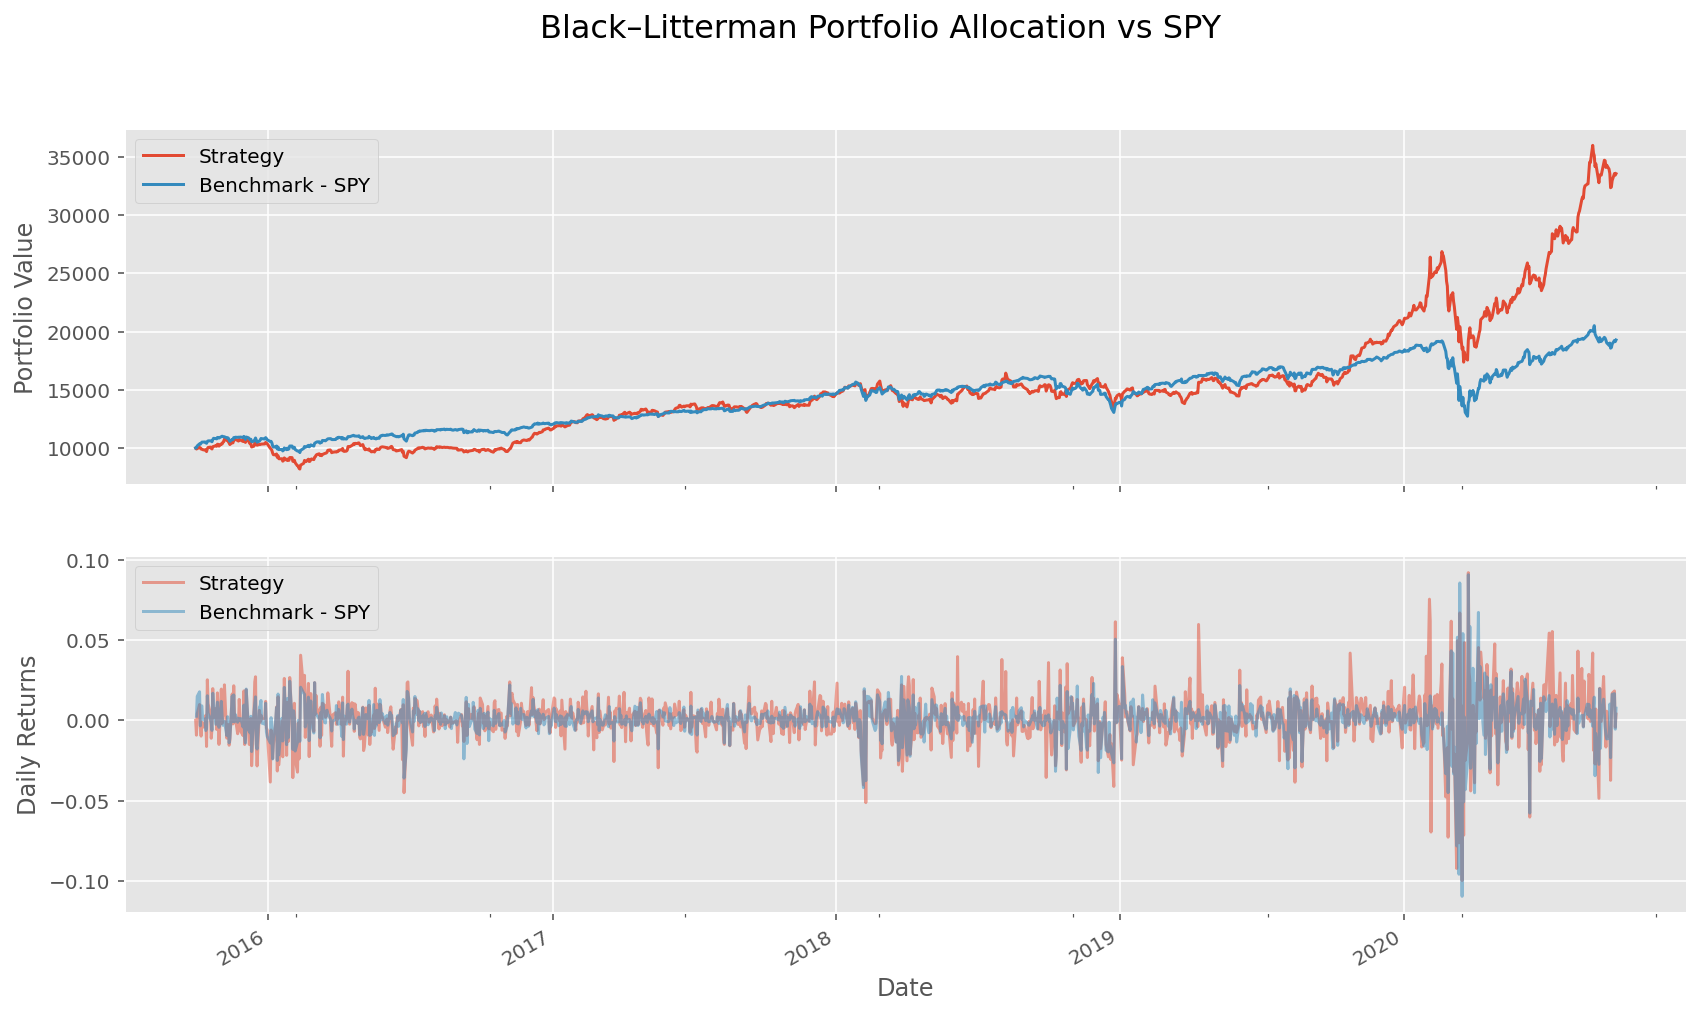

In [59]:
portfolio_value = returns.cumsum().apply(np.exp) * startcash

# Visulize the output
fig, ax = plt.subplots(2, 1, sharex=True, figsize=[14, 8])

# portfolio value
portfolio_value.plot(ax=ax[0], label='Strategy')
benchmark_prices.plot(ax=ax[0], label='Benchmark - SPY')
ax[0].set_ylabel('Portfolio Value')
ax[0].grid(True)
ax[0].legend()

# daily returns
returns.plot(ax=ax[1], label='Strategy', alpha=0.5)
benchmark_rets.plot(ax=ax[1], label='Benchmark - SPY', alpha=0.5)
ax[1].set_ylabel('Daily Returns')

fig.suptitle('Black–Litterman Portfolio Allocation vs SPY', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('./images/BLvsSPY', bbox_inches='tight')

In [60]:
# get performance statistics for strategy
pf.show_perf_stats(returns,)

Start date,2015-09-30
End date,2020-09-30
Total months,60
,Backtest
Annual return,23.7%
Cumulative returns,190.0%
Annual volatility,24.1%
Sharpe ratio,1.00
Calmar ratio,0.64
Stability,0.83
Max drawdown,-37.1%


In [61]:
# get performance statistics for benchmark
pf.show_perf_stats(benchmark_rets)

Start date,2015-10-01
End date,2020-09-30
Total months,59
,Backtest
Annual return,14.0%
Cumulative returns,92.8%
Annual volatility,18.8%
Sharpe ratio,0.79
Calmar ratio,0.42
Stability,0.91
Max drawdown,-33.7%


In [143]:
import pyfolio as pf

/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


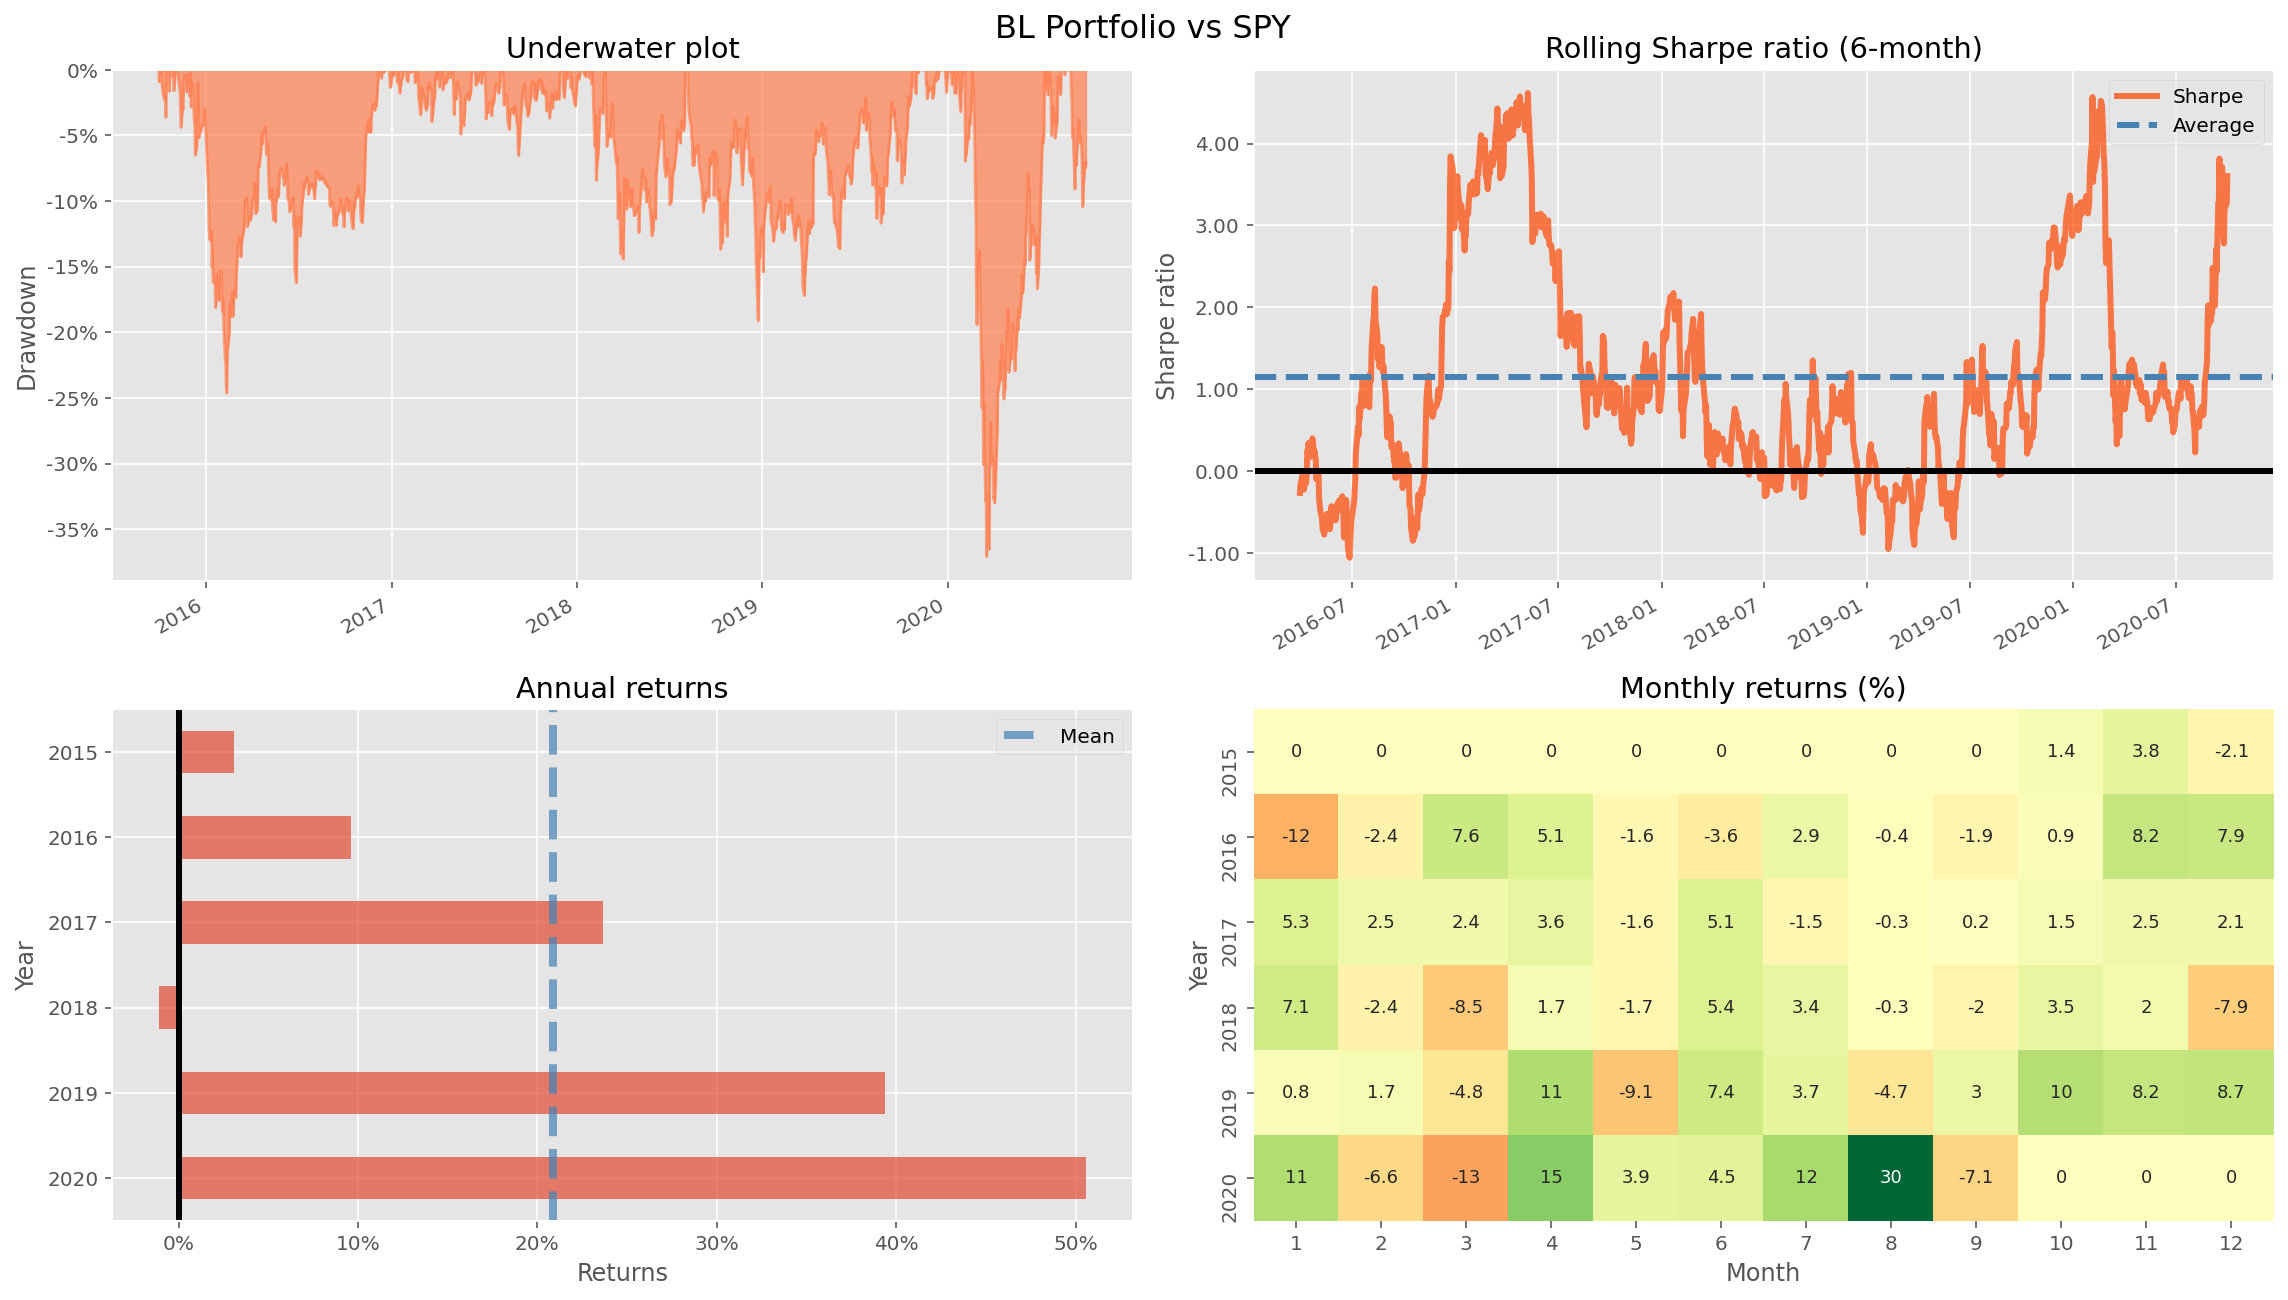

In [187]:
# plot performance
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_underwater(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[1])
axes[1].grid(True)
pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
fig.suptitle('BL Portfolio vs SPY', fontsize=16, y=1.0)


plt.tight_layout()
plt.savefig('images/chart8.png', bbox_inches='tight')
